![imagen](fifa22.jpg)

1. IMPORTAR LIBRERIAS BASICAS

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import requests
import random
from math import pi
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


2. LECTURA DE LA BASE DE DATOS LA CUAL SE LLAMARÁ "DATA"

In [2]:

data=pd.read_csv("archive/FIFA22_official_data.csv")

3. ANALISIS DE LA INFORMACIÓN

In [3]:
#dimensión
data.shape

(16710, 65)

In [4]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,€125.5M,€350K,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2025,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,€37M,€45K,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [6]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [7]:
data.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16702.000000,16702.000000,16673.000000,16710.000000,16459.000000,892.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,15818.000000
mean,220560.467923,25.727409,67.646320,72.572292,1652.497307,1.169958,3.008199,2.475464,20.458643,52.212448,48.725075,54.123339,61.314423,45.652972,58.591203,50.574522,45.074087,55.454877,61.387433,65.684919,65.783124,65.222875,63.592400,64.943262,60.642190,65.896659,64.204548,66.266008,49.989228,57.955536,48.057418,53.150461,56.378936,50.615919,61.001883,48.021300,49.155536,46.830564,15.683662,15.521364,15.457989,15.581927,15.789228,68.565410,48.019408
std,38496.607959,5.048910,6.457695,5.688085,257.271696,0.485305,0.681742,0.791414,17.699813,17.772348,19.401715,17.007831,13.665353,17.828225,17.925005,18.237536,17.596471,14.494716,15.673348,15.005583,14.737924,14.512499,8.594003,14.257323,12.959795,12.285499,15.575110,12.624115,19.082943,16.855790,20.846484,19.204880,13.415572,15.756832,11.399833,21.904204,21.454857,21.175431,17.009757,16.302298,16.099993,16.584045,17.318251,6.256253,20.181354
min,27.000000,16.000000,28.000000,38.000000,571.000000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000,5.000000,8.000000,4.000000,5.000000,6.000000,4.000000,9.000000,8.000000,13.000000,15.000000,18.000000,28.000000,19.000000,12.000000,22.000000,13.000000,18.000000,4.000000,11.000000,4.000000,3.000000,10.000000,7.000000,12.000000,4.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,203891.250000,22.000000,63.000000,69.000000,1525.000000,1.000000,3.000000,2.000000,8.000000,42.000000,34.000000,46.000000,57.000000,33.000000,54.000000,39.000000,33.000000,47.000000,58.000000,58.000000,59.000000,57.000000,58.000000,57.000000,52.000000,59.000000,57.000000,59.000000,37.000000,47.000000,28.000000,44.000000,48.000000,41.000000,55.000000,27.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,30.000000
50%,229253.000000,25.000000,68.000000,72.000000,1687.000000,1.000000,3.000000,2.000000,17.000000,57.000000,53.000000,57.000000,64.000000,48.000000,63.500000,53.000000,44.000000,58.000000,65.000000,68.000000,68.000000,68.000000,64.000000,67.000000,62.000000,67.000000,67.000000,68.000000,55.000000,61.000000,55.000000,58.000000,58.000000,52.000000,62.000000,53.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,54.000000
75%,245368.750000,29.000000,72.000000,76.000000,1826.000000,1.000000,3.000000,3.000000,27.000000,65.000000,64.000000,66.000000,70.000000,59.000000,70.000000,64.000000,59.000000,66.000000,71.000000,76.000000,76.000000,75.000000,69.000000,75.000000,70.000000,74.000000,75.000000,75.000000,65.000000,71.000000,65.000000,67.000000,66.000000,62.000000,69.000000,67.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,264704.000000,54.000000,93.000000,95.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,95.000000,93.000000,94.000000,90.000000,96.000000,94.000000,94.000000,93.000000,96.000000,97.000000,97.000000,

In [8]:
#VERIFICACION DE VALORES NULL
data.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          264
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      29
Real Face                      29
Position                       26
Jersey Number                  26
Joined                       1512
Loaned From                 15578
Contract Valid Until          351
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccurac

In [9]:
display(data['Position'].unique())
len(data['Position'].unique())


array(['<span class="pos pos18">CAM', '<span class="pos pos11">LDM',
       '<span class="pos pos24">RS', '<span class="pos pos13">RCM',
       '<span class="pos pos7">LB', '<span class="pos pos9">RDM',
       '<span class="pos pos15">LCM', '<span class="pos pos28">SUB',
       '<span class="pos pos26">LS', '<span class="pos pos12">RM',
       '<span class="pos pos6">LCB', '<span class="pos pos16">LM',
       '<span class="pos pos3">RB', '<span class="pos pos10">CDM',
       '<span class="pos pos23">RW', '<span class="pos pos27">LW',
       '<span class="pos pos25">ST', '<span class="pos pos14">CM',
       '<span class="pos pos20">RF', '<span class="pos pos8">LWB',
       '<span class="pos pos17">RAM', '<span class="pos pos21">CF',
       '<span class="pos pos29">RES', '<span class="pos pos22">LF',
       '<span class="pos pos2">RWB', '<span class="pos pos5">CB',
       '<span class="pos pos4">RCB', nan, '<span class="pos pos19">LAM',
       '<span class="pos pos0">GK'], dtype=object)

30

In [10]:
#limpieza de la columna posición
data.Position.replace({'<span class="pos pos18">CAM':'CAM','<span class="pos pos24">RS':'RS','<span class="pos pos7">LB':'LB','<span class="pos pos15">LCM':'LCM','<span class="pos pos26">LS':'LS','<span class="pos pos6">LCB':'LCB','<span class="pos pos3">RB':'RB','<span class="pos pos23">RW':'RW','<span class="pos pos25">ST':'ST','<span class="pos pos20">RF':'RF','<span class="pos pos17">RAM':'RAM', '<span class="pos pos29">RES':'RES','<span class="pos pos2">RWB':'RWB','<span class="pos pos4">RCB':'RCB','<span class="pos pos0">GK':'GK','<span class="pos pos11">LDM':'LDM','<span class="pos pos13">RCM':'RCM', '<span class="pos pos9">RDM':'RDM','<span class="pos pos28">SUB':'SUB','<span class="pos pos12">RM':'RM','<span class="pos pos16">LM':'LM','<span class="pos pos10">CDM':'CDM','<span class="pos pos27">LW':'LW', '<span class="pos pos14">CM':'CM','<span class="pos pos8">LWB':'LWB','<span class="pos pos21">CF':'CF','<span class="pos pos22">LF':'LF','<span class="pos pos5">CB':'CB','<span class="pos pos19">LAM':'LAM'}, inplace=True)


In [11]:
display(data['Position'].unique())
len(data['Position'].unique())

array(['CAM', 'LDM', 'RS', 'RCM', 'LB', 'RDM', 'LCM', 'SUB', 'LS', 'RM',
       'LCB', 'LM', 'RB', 'CDM', 'RW', 'LW', 'ST', 'CM', 'RF', 'LWB',
       'RAM', 'CF', 'RES', 'LF', 'RWB', 'CB', 'RCB', nan, 'LAM', 'GK'],
      dtype=object)

30

Completando los valores vacios de las columnas. En la mayoría han sido completados con la media de la categoría, en otros casos se ha asignado valores referenciales según información basada en google como:  
* Salario minimo de un jugador de primera división que asciende a los 155K€ al año.
* Preferencia de tiro, derecha.  
* Numero de jugador 90.  
* Fecha de Contrato desde el 2021 al 2023. 

In [12]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2023, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2021', inplace = True)
data['Jersey Number'].fillna(90, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€155K', inplace = True)
data.fillna(0, inplace = True)

In [13]:
data.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

Tenemos la percerción de que en cada equipo de futbol hay por lo menos un jugador sudamericano.   
**Hipotesis 1**:  
Los jugadores más completos son de Brasil y Argentina.  
Pdt: Se han tomado la potencia y el puntaje general para evaluar este análisis. 

In [14]:
data[['Potential','Overall']].describe()

,Potential,Overall
count,16710.000000,16710.000000
mean,72.572292,67.646320
std,5.688085,6.457695
min,38.000000,28.000000
25%,69.000000,63.000000
50%,72.000000,68.000000
75%,76.000000,72.000000
max,95.000000,93.000000


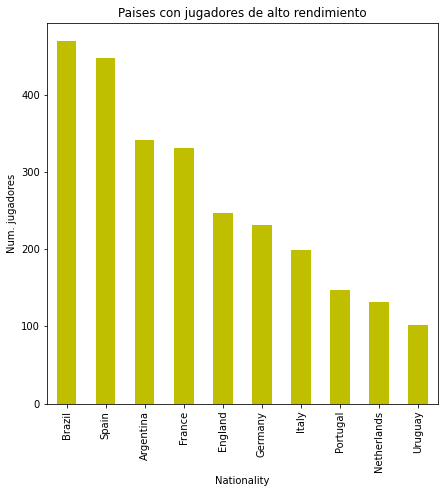

In [15]:
data.query('Potential>75' and 'Overall>71').groupby('Nationality')['ID'].count().to_frame()['ID'].sort_values(ascending=False).head(10).plot(figsize=(7,7),kind='bar', color="y");
plt.title('Paises con jugadores de alto rendimiento');
plt.ylabel('Num. jugadores');

In [16]:
#guardamos data limpia con un cvs
data.to_csv('Data_Fifa.csv', index=False)

Jugadores y Habilidades

Text(0.5, 1.0, ' mapa de correlaciones')

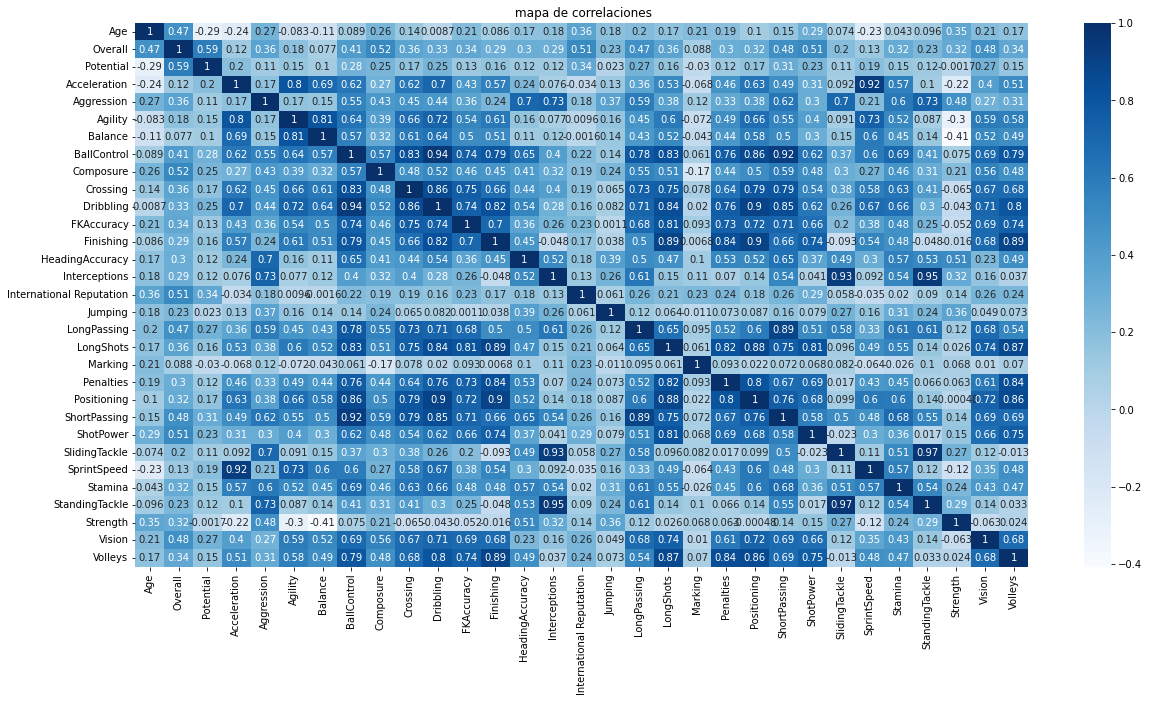

In [17]:
plt.figure(figsize=(20,10))
mapa = sns.heatmap(data[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower','SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot=True, cmap='Blues')
mapa.set_title(' mapa de correlaciones')

Agrupamos diferentes habilidades para definir los siguientes grupos:
* General= Puntería, Dribbling, Control del balon, efecto. 
* Denfesa = Marcación, Tacleo y Barrido
* Pase = Cruce, pase corto y pase largo
* Mobilidad= Acelaración, Sprint, Agilidad y reacción
* Potencia= Balance, Salto, Stamina, Fuerza
* Rating = Potencial, rating general.
* Disparo= Bolea, Potencia de disparo, tiro corto, penalties, acabado. 


In [18]:
def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))


Agregamos nuevas columnas para poder analizar según las agrupaciones mencionadas

In [19]:
data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

In [20]:
players = data[['Name','Position','General','Defending','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

In [21]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16710 non-null  object
 1   Position     16710 non-null  object
 2   General      16710 non-null  int64 
 3   Defending    16710 non-null  int64 
 4   Mental       16710 non-null  int64 
 5   Passing      16710 non-null  int64 
 6   Mobility     16710 non-null  int64 
 7   Power        16710 non-null  int64 
 8   Rating       16710 non-null  int64 
 9   Shooting     16710 non-null  int64 
 10  Flag         16710 non-null  object
 11  Age          16710 non-null  int64 
 12  Nationality  16710 non-null  object
 13  Photo        16710 non-null  object
 14  Club_Logo    16710 non-null  object
 15  Club         16710 non-null  object
dtypes: int64(9), object(7)
memory usage: 2.0+ MB


In [22]:
players.head()

,Name,Position,General,Defending,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
0,Bruno Fernandes,CAM,80,46,82,89,80,78,88,88,https://cdn.sofifa.com/flags/pt.png,26,Portugal,https://cdn.sofifa.com/players/212/198/22_60.png,https://cdn.sofifa.com/teams/11/30.png,Manchester United
1,L. Goretzka,LDM,83,54,84,82,81,82,88,76,https://cdn.sofifa.com/flags/de.png,26,Germany,https://cdn.sofifa.com/players/209/658/22_60.png,https://cdn.sofifa.com/teams/21/30.png,FC Bayern München
2,L. Suárez,RS,85,28,78,80,78,78,88,88,https://cdn.sofifa.com/flags/uy.png,34,Uruguay,https://cdn.sofifa.com/players/176/580/22_60.png,https://cdn.sofifa.com/teams/240/30.png,Atlético de Madrid
3,K. De Bruyne,RCM,80,39,83,94,80,76,91,85,https://cdn.sofifa.com/flags/be.png,30,Belgium,https://cdn.sofifa.com/players/192/985/22_60.png,https://cdn.sofifa.com/teams/10/30.png,Manchester City
4,M. Acuña,LB,80,55,83,82,80,81,84,75,https://cdn.sofifa.com/flags/ar.png,29,Argentina,https://cdn.sofifa.com/players/224/334/22_60.png,https://cdn.sofifa.com/teams/481/30.png,Sevilla FC


In [23]:
def details(row, title, image, age, nationality, photo, logo, club, position):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
        
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
        
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club','Position']
    N = len(categories) - len(coulumnDontUseGraph)
    rest_categories=['General','Defensa','Mental','Passing','Mobity','Power','Rating','Shooting']
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], rest_categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club,position]
    values = [e for e in values if e not in valuesDontUseGraph]
    values += values[:1]
    
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    ax.annotate('Position: ' + str(position), xy=(10,10), xytext=(42, 150),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [24]:
def graphPolar(id = 0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club_Logo'][id], 
                club = players['Club'][id],
                position = players['Position'][id])
    else:
        print('La base de datos solo contiene 16710 jugadores. Debes colocar un número inferior a 16710')

In [25]:
players[players['Club'].str.contains('Real Madrid', case=False, na=False, regex=True )]

,Name,Position,General,Defending,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
10,L. Modrić,RCM,79,49,80,89,81,75,87,78,https://cdn.sofifa.com/flags/hr.png,35,Croatia,https://cdn.sofifa.com/players/177/003/22_60.png,https://cdn.sofifa.com/teams/243/30.png,Real Madrid CF
13,D. Alaba,LB,78,55,79,82,80,77,84,75,https://cdn.sofifa.com/flags/at.png,29,Austria,https://cdn.sofifa.com/players/197/445/22_60.png,https://cdn.sofifa.com/teams/243/30.png,Real Madrid CF
28,Casemiro,CDM,72,58,83,75,69,83,89,72,https://cdn.sofifa.com/flags/br.png,29,Brazil,https://cdn.sofifa.com/players/200/145/22_60.png,https://cdn.sofifa.com/teams/243/30.png,Real Madrid CF
74,G. Bale,SUB,84,34,73,82,80,71,82,84,https://cdn.sofifa.com/flags/gb-wls.png,31,Wales,https://cdn.sofifa.com/players/173/731/22_60.png,https://cdn.sofifa.com/teams/243/30.png,Real Madrid CF
79,F. Valverde,SUB,72,52,80,78,83,74,86,71,https://cdn.sofifa.com/flags/uy.png,22,Uruguay,https://cdn.sofifa.com/players/239/053/22_60.png,https://cdn.sofifa.com/teams/243/30.png,Real Madrid CF
107,Marcelo,SUB,84,52,79,80,76,72,80,68,https://cdn.sofifa.com/flags/br.png,33,Brazil,https://cdn.sofifa.com/players/176/676/22_60.png,https://cdn.sofifa.com/teams/243/30.png,Real Madrid CF
116,T. Kroos,LCM,78,44,79,91,65,62,88,82,https://cdn.sofifa.com/flags/de.png,31,Germany,https://cdn.sofifa.com/players/182/521/22_60.png,https://cdn.sofifa.com/teams/243/30.png,Real Madrid CF
117,F. Mendy,SUB,76,54,79,79,86,82,84,55,https://cdn.sofifa.com/flags/fr.png,26,France,https://cdn.sofifa.com/players/228/618/22_60.png,https://cdn.sofifa.com/teams/243/30.png,Real Madrid CF
146,Lucas Vázquez,SUB,75,45,76,79,82,74,81,69,https://cdn.sofifa.com/flags/es.png,30,Spain,https://cdn.sofifa.com/players/208/618/22_60.png,https://cdn.sofifa.com/teams/243/30.png,Real Madrid CF
184,Carvajal,RB,77,55,79,80,80,80,85,51,https://cdn.sofifa.com/flags/es.png,29,Spain,https://cdn.sofifa.com/players/204/963/22_60.png,https://cdn.sofifa.com/teams/243/30.png,Real Madrid CF


In [26]:
players[players['Name'].str.contains('Piqu', case=False, na=False, regex=True )]


,Name,Position,General,Defending,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
1187,Piqué,LCB,71,56,78,72,64,64,84,58,https://cdn.sofifa.com/flags/es.png,34,Spain,https://cdn.sofifa.com/players/152/729/22_60.png,https://cdn.sofifa.com/teams/241/30.png,FC Barcelona
6941,21 J. Piquerez,LB,59,36,53,67,69,65,73,57,https://cdn.sofifa.com/flags/uy.png,21,Uruguay,https://cdn.sofifa.com/players/254/623/21_60.png,https://cdn.sofifa.com/teams/101110/30.png,Club Atlético Peñarol


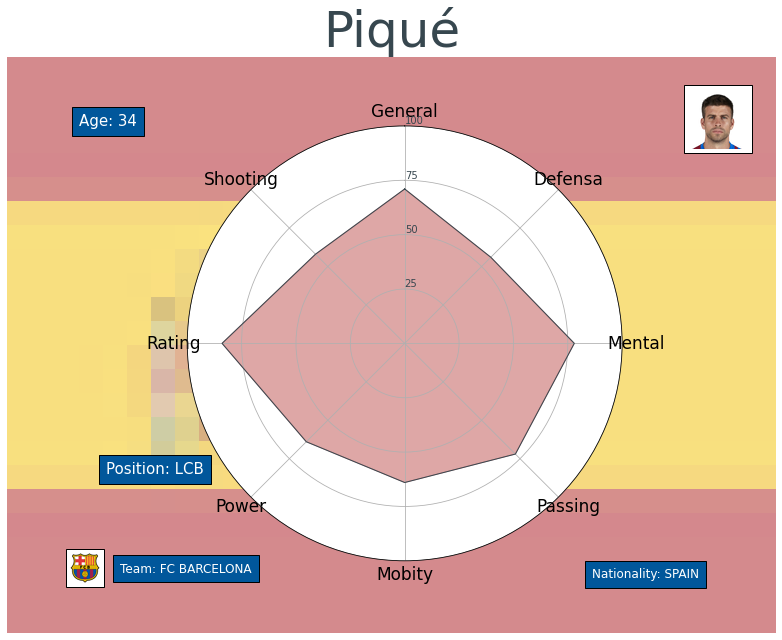

In [27]:
graphPolar(1187)

Hipotesis 2:
Es Brasil el país con más jugadores al rededor del mundo. 


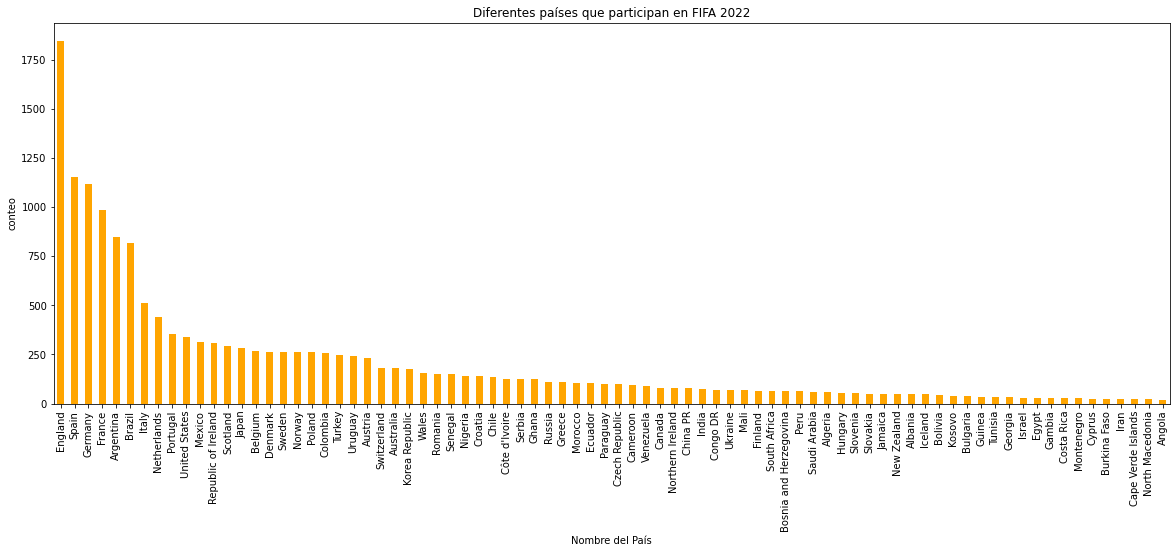

In [28]:
data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Diferentes países que participan en FIFA 2022')
plt.xlabel('Nombre del País')
plt.ylabel('conteo')
plt.show()

Histograma: Numero de judadores con edades similares

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


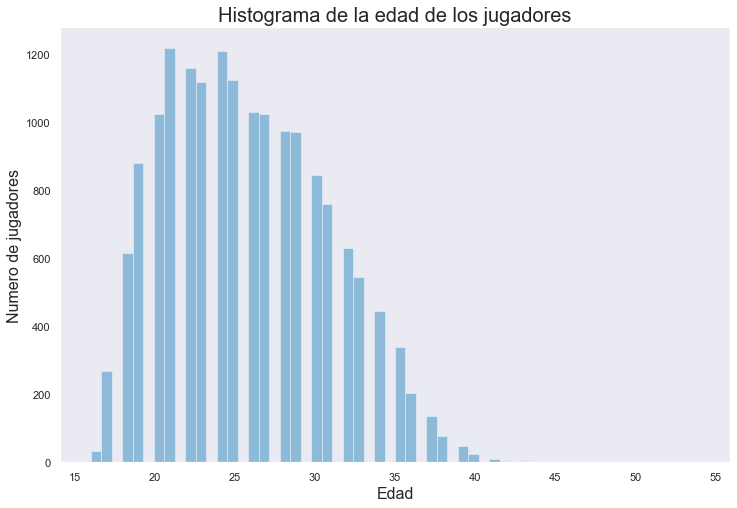

In [29]:
sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'b')
ax.set_xlabel(xlabel = "Edad", fontsize = 16)
ax.set_ylabel(ylabel = 'Numero de jugadores', fontsize = 16)
ax.set_title(label = 'Histograma de la edad de los jugadores', fontsize = 20)
plt.show()

Mejores jugadores por cada posicion en el juego con sus edades, clubes y nacionalidad. La clasificación ha sido asignada por los puntajes generales. 

In [34]:
players['media_puntaje'] = (players.loc[ : ,['General','Defending','Mental','Passing','Mobility','Power','Rating','Shooting']].sum(axis = 1))/8
#exportamos data a un cvs
players.head()
players.to_csv('players.csv', index=False)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
players.iloc[players.groupby(data['Position'])['media_puntaje'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]


,Position,Name,Age,Club,Nationality
0,CAM,Bruno Fernandes,26,Manchester United,Portugal
282,CB,R. Bazoer,24,Vitesse,Netherlands
28,CDM,Casemiro,29,Real Madrid CF,Brazil
68,CF,Roberto Firmino,29,Liverpool,Brazil
42,CM,M. Verratti,28,Paris Saint-Germain,Italy
11192,GK,Ederson,27,Manchester City,Brazil
673,LAM,20 N. Cardozo,32,Defensa y Justicia,Argentina
4,LB,M. Acuña,29,Sevilla FC,Argentina
12,LCB,Sergio Ramos,35,Paris Saint-Germain,Spain
6,LCM,Paulinho,32,Al Ahli,Brazil


Mejores jugadores de cada posición con su edad, nacionalidad, club según sus puntajes potenciales

In [32]:
data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
0,CAM,Bruno Fernandes,26,Manchester United,Portugal
5053,CB,J. Giménez,26,Atlético de Madrid,Uruguay
28,CDM,Casemiro,29,Real Madrid CF,Brazil
201,CF,K. Benzema,33,Real Madrid CF,France
13387,CM,07 P. Cocu,35,PSV,Netherlands
14244,GK,J. Oblak,28,Atlético de Madrid,Slovenia
1424,LAM,D. Szoboszlai,20,RB Leipzig,Hungary
61,LB,T. Hernández,23,AC Milan,France
1210,LCB,M. de Ligt,21,Juventus,Netherlands
703,LCM,Pedri,18,FC Barcelona,Spain


Comparativa de los puntajes generales de los países con el mayor numero de jugadores

In [33]:
data['Nationality'].value_counts().head(8)

England        1845
Spain          1151
Germany        1120
France          987
Argentina       846
Brazil          819
Italy           514
Netherlands     443
Name: Nationality, dtype: int64